# 🏠 **HOUSE PRICE ANALYSIS AND PREDICTION**

This project aims to analyze housing data and build machine learning models to predict house prices based on features like area, number of bedrooms, baths, location, and geographic coordinates. The workflow includes data preprocessing, exploratory data analysis (EDA), feature engineering, outlier treatment, model training, evaluation, and prediction. Various regression models are compared to identify the most accurate one for estimating property prices.

# 📦 Import Libraries

In [167]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# 📥 Load Dataset

In [168]:
df = pd.read_csv('zameen-updated.csv')
pd.set_option('display.max_columns', None)
df.columns = df.columns.str.strip()
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,34,73,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,34,73,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,34,73,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,34,73,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33,73,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8,5-10 Marla


In [169]:
df.head(5)


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,34,73,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,34,73,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,34,73,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,34,73,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33,73,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8,5-10 Marla


In [170]:
df.tail(5)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25,67,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,10,5-10 Marla
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25,67,0,8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8,5-10 Marla
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25,67,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,10,5-10 Marla
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25,67,0,7.8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8,5-10 Marla
168445,17355287,10045,https://www.zameen.com/Property/bahria_town_ka...,House,9000000,Bahria Town Karachi,Karachi,Sindh,25,67,3,9.4 Marla,For Sale,3,07-18-2019,ZPN Real Estate & Builders,Ali Raza,Marla,9,5-10 Marla


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [172]:
df.shape

(168446, 20)

In [173]:
df.describe

<bound method NDFrame.describe of         property_id  location_id  \
0            237062         3325   
1            346905         3236   
2            386513          764   
3            656161          340   
4            841645         3226   
...             ...          ...   
168441     17355248         6754   
168442     17355249          680   
168443     17355250         6757   
168444     17355251         6752   
168445     17355287        10045   

                                                 page_url property_type  \
0       https://www.zameen.com/Property/g_10_g_10_2_gr...          Flat   
1       https://www.zameen.com/Property/e_11_2_service...          Flat   
2       https://www.zameen.com/Property/islamabad_g_15...         House   
3       https://www.zameen.com/Property/islamabad_bani...         House   
4       https://www.zameen.com/Property/dha_valley_dha...         House   
...                                                   ...           ...   
168441  

#  🧹 Data Cleaning

In [174]:
df = df[df['price'] > 0]
df = df[df['baths'] >= 0]
df = df[df['bedrooms'] >= 0]
df = df[(df['latitude'].between(-90, 90)) & (df['longitude'].between(-180, 180))]
df['agency'].fillna('Unknown', inplace=True)
df['agent'].fillna('Unknown', inplace=True)
df.drop_duplicates(inplace=True)

# 🧠 Feature Engineering

In [175]:
def convert_area(area):
    if isinstance(area, str):
        area = area.replace(',', '')
        if 'marla' in area.lower():
            return float(area.split()[0]) * 272.25
        elif 'kanal' in area.lower():
            return float(area.split()[0]) * 20 * 272.25
        elif 'square feet' in area.lower():
            return float(area.split()[0])
    return np.nan

df['area'] = df['area'].apply(convert_area)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['house_age'] = datetime.datetime.now().year - df['date_added'].dt.year
df['house_age'].fillna(df['house_age'].median(), inplace=True)
df['baths_per_bedroom'] = df['baths'] / df['bedrooms']
df['baths_per_bedroom'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['baths_per_bedroom'].fillna(df['baths_per_bedroom'].median(), inplace=True)
df['bedrooms_per_floor'] = df['bedrooms'] / df['area']
df['bedrooms_per_floor'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['bedrooms_per_floor'].fillna(df['bedrooms_per_floor'].median(), inplace=True)

# 📦 Outlier Handling

In [176]:
numerical_cols = ['price', 'latitude', 'longitude', 'baths', 'bedrooms']
for col in numerical_cols:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])

# 📊 **Exploratory Data Analysis (EDA)**

# 🔹 Histograms for Numerical Features

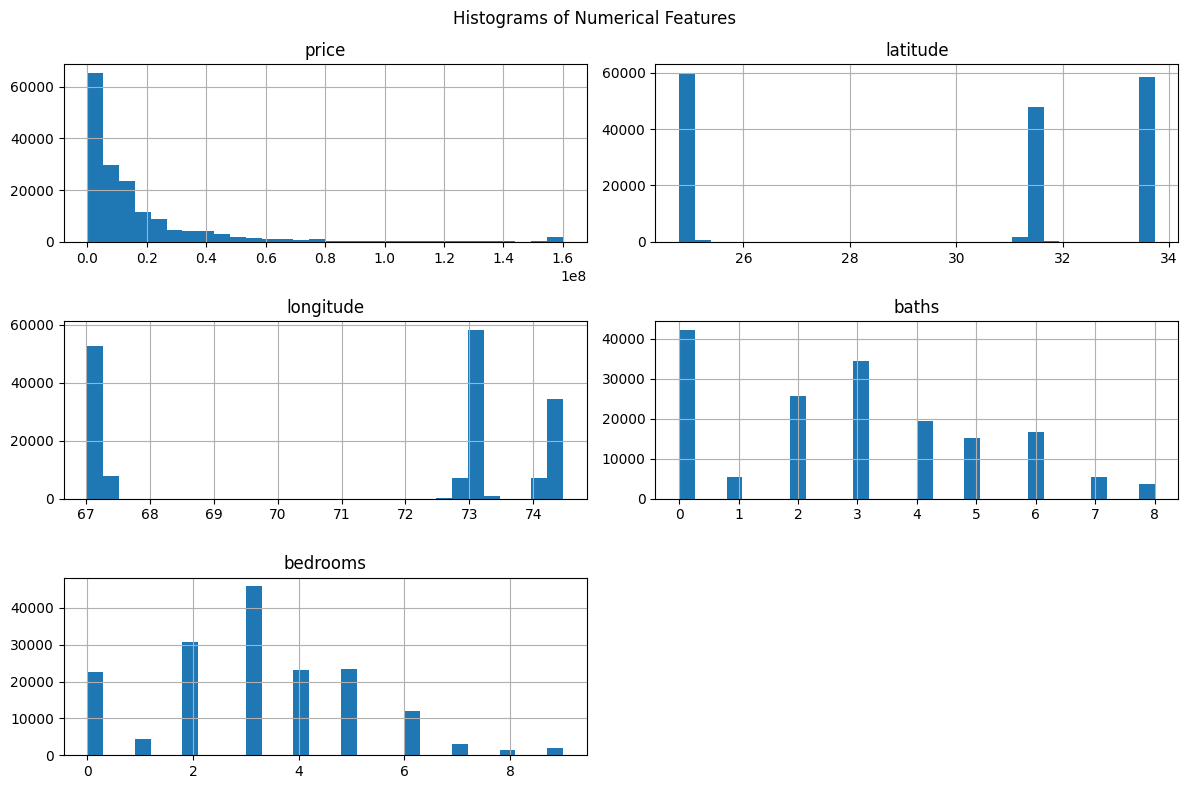

In [177]:
df[numerical_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

# 🔹 Boxplots for Numerical Features

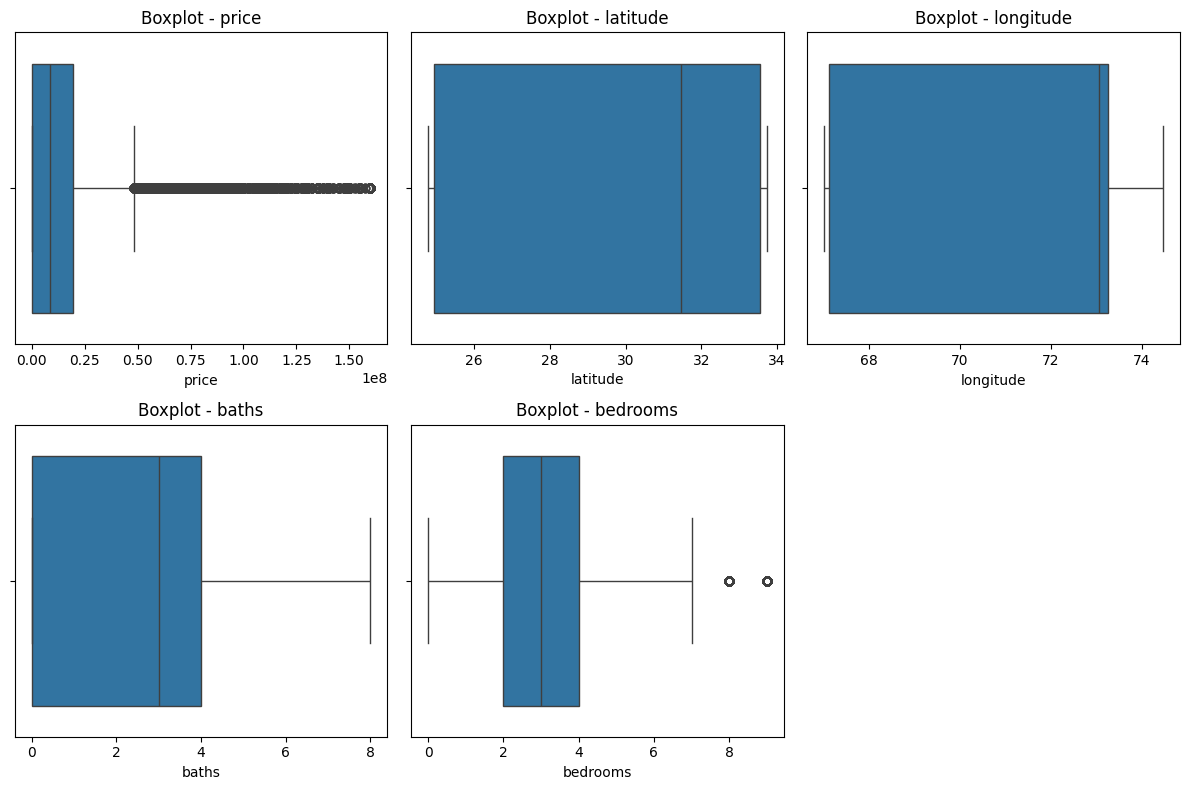

In [178]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
plt.tight_layout()
plt.show()

# 🔹 Scatter Plots (vs Price)

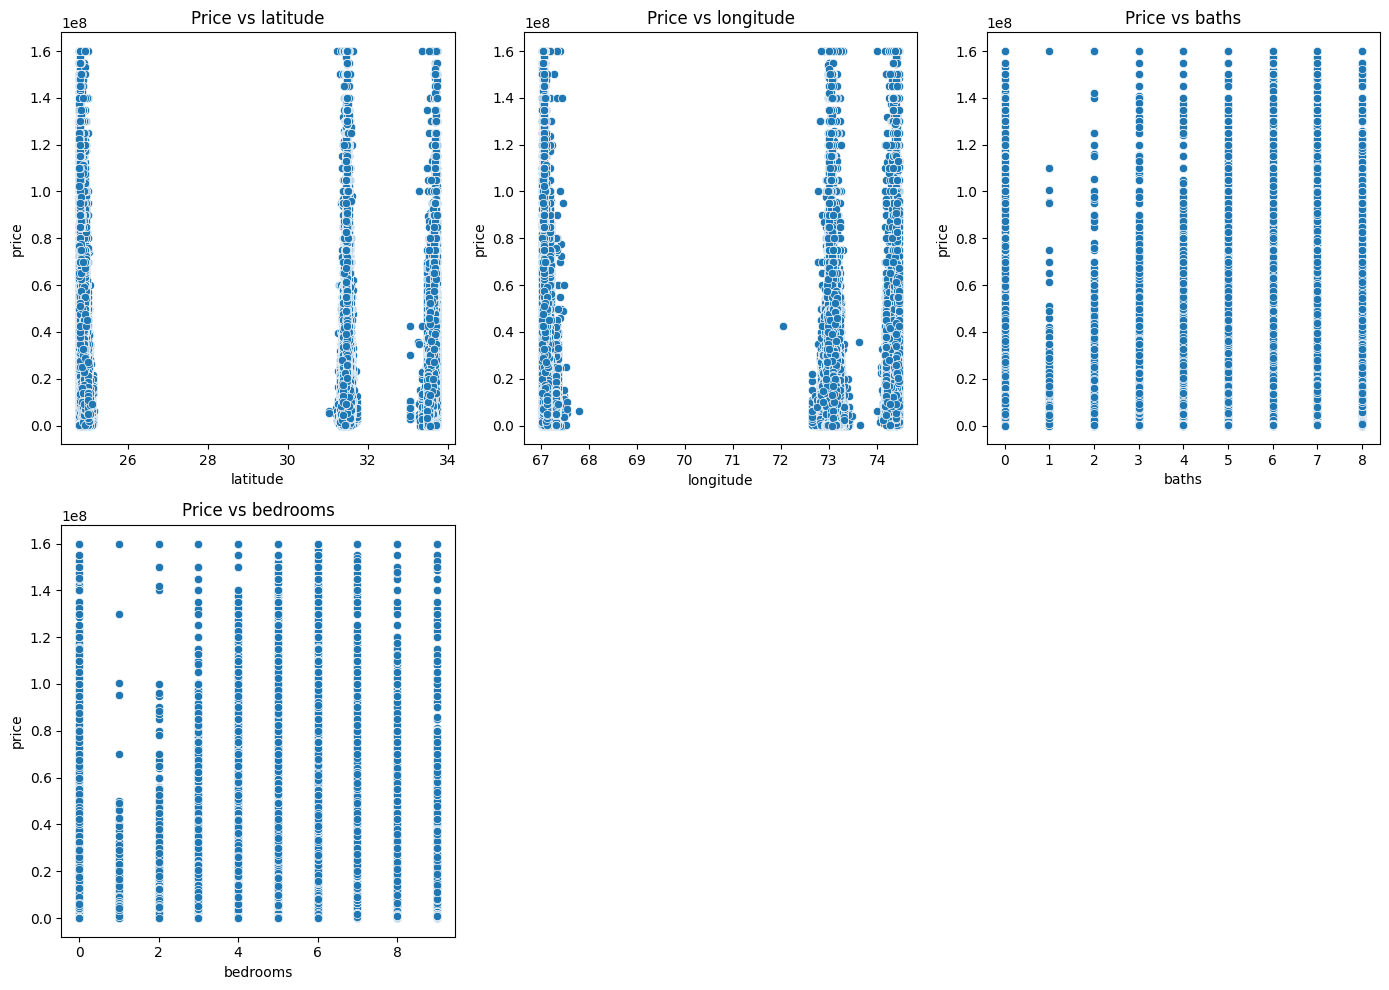

In [179]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_cols):
    if col != 'price':
        plt.subplot(2, 3, i)
        sns.scatterplot(data=df, x=col, y='price')
        plt.title(f"Price vs {col}")
plt.tight_layout()
plt.show()

# 🔹 Bar Plots for Categorical Features

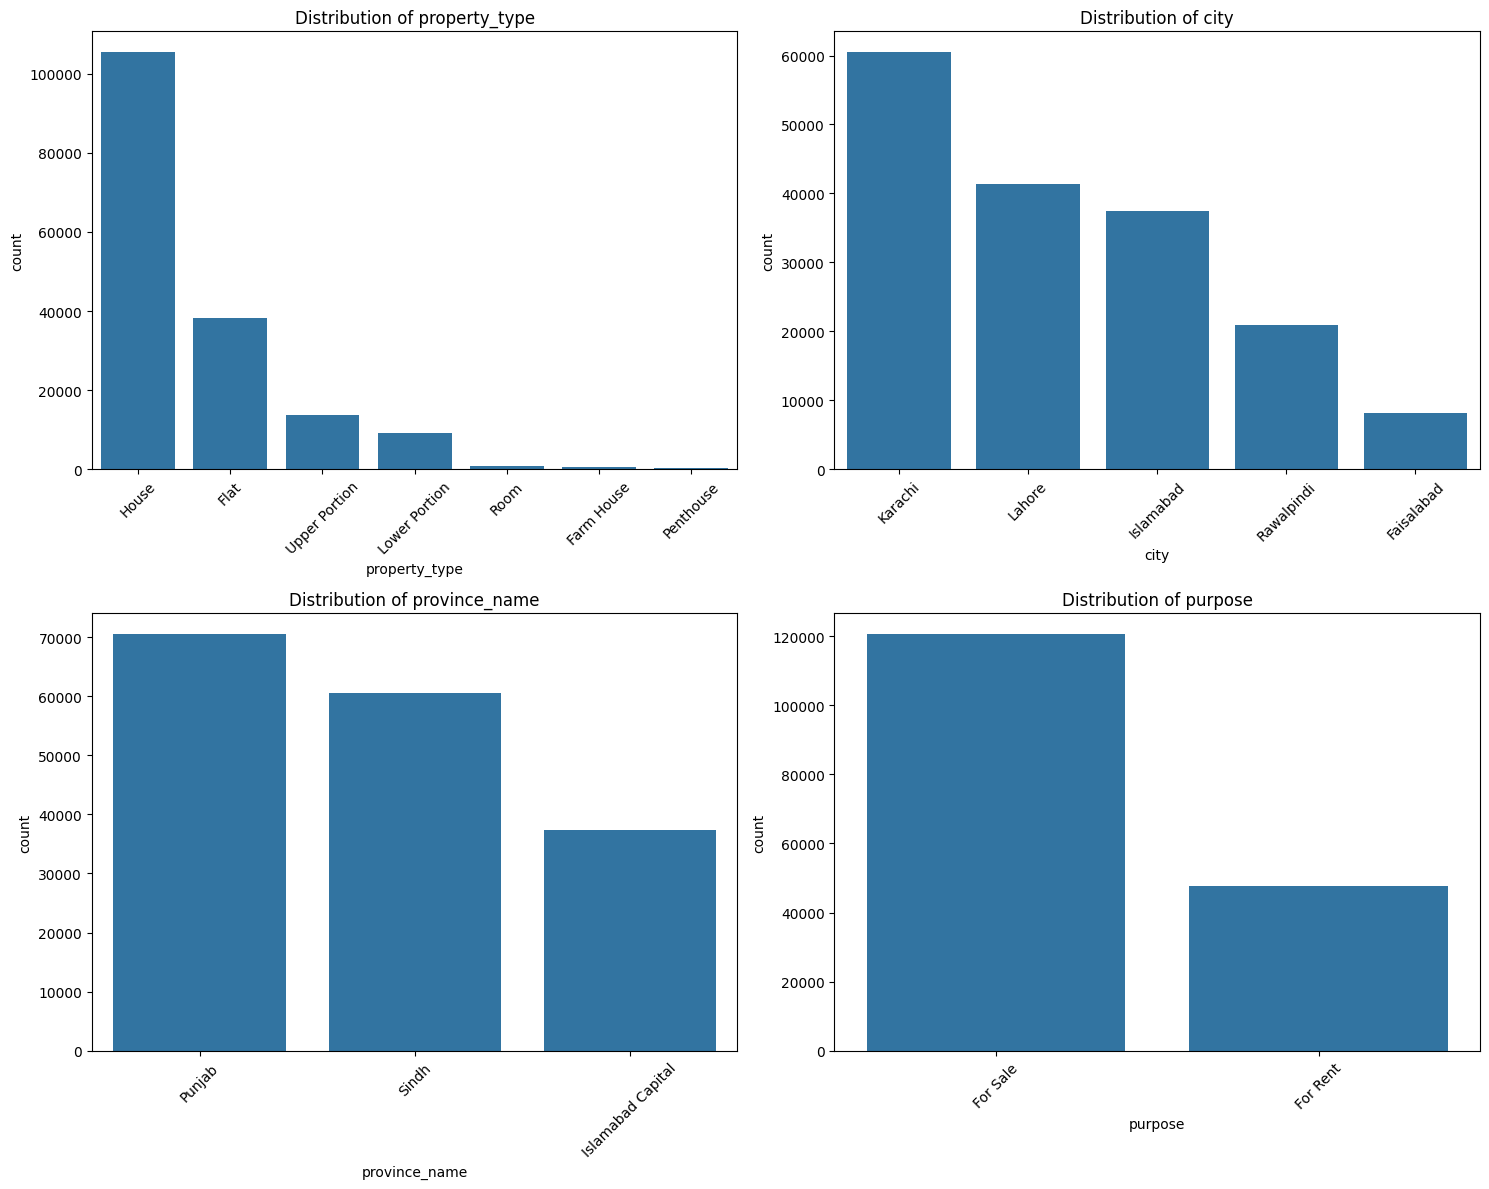

In [180]:
categorical_cols = ['property_type', 'city', 'province_name', 'purpose']
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# 🔹 Correlation Matrix and Heatmap

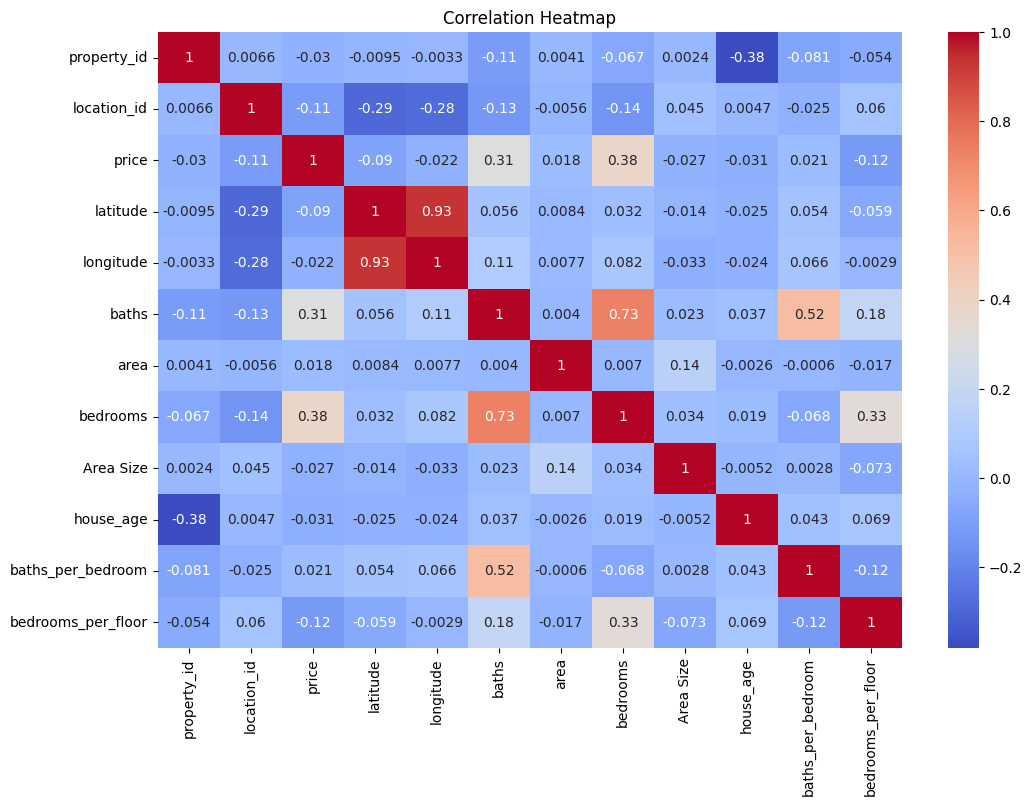

In [181]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 🔀 Train-Test Split

In [182]:
features = ['area', 'bedrooms', 'baths', 'house_age', 'latitude', 'longitude']
X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 Model Training

# LINEAR REGRESSION

In [183]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

# GRADIENT BOOSTING REGRESSION

In [184]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

# RANDOM FOREST 

In [185]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

 # 💾 Save Trained Models

In [186]:
joblib.dump(lr_model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [187]:
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [188]:
joblib.dump(gb_model, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

# PREDICTING MODELS

In [189]:
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

# 📈 Evaluate Models

In [190]:
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R2 Score:", r2_score(y_true, y_pred))
    accuracy = 100 - (mean_absolute_error(y_true, y_pred) / y_true.mean() * 100)
    print(f"Accuracy (approx): {accuracy:.2f}%")
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Gradient Boosting", y_test, y_pred_gb)

Linear Regression Performance:
MAE: 14252968.145452863
MSE: 566593011427353.8
R2 Score: 0.17451625966332962
Accuracy (approx): 14.60%
Random Forest Performance:
MAE: 6960062.62625277
MSE: 261398501319646.03
R2 Score: 0.6191618882764707
Accuracy (approx): 58.30%
Gradient Boosting Performance:
MAE: 9382822.232379714
MSE: 302260947725882.6
R2 Score: 0.5596283528843706
Accuracy (approx): 43.78%


# 📊 Model Comparison Visuals

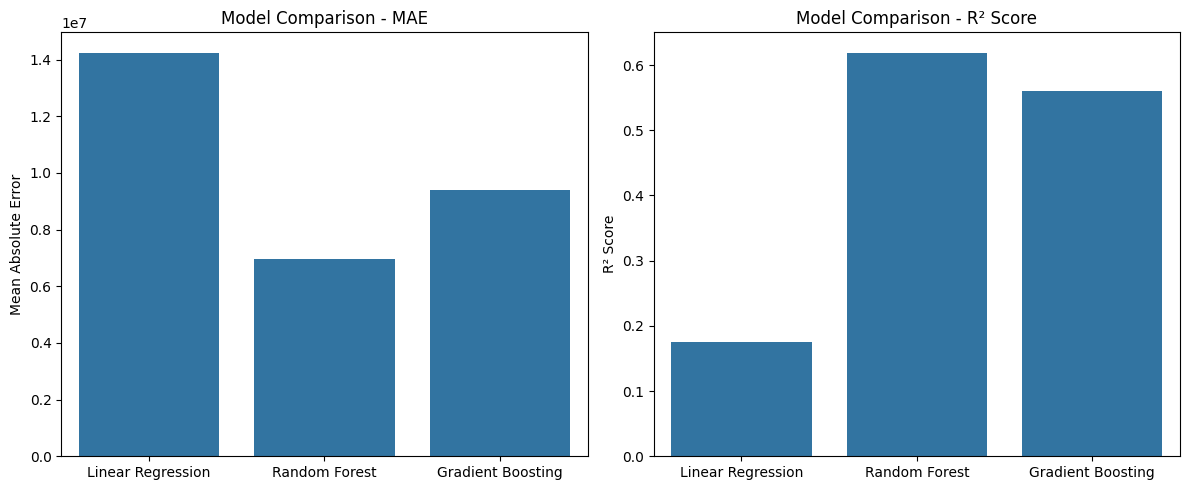

In [191]:
model_names = ["Linear Regression", "Random Forest", "Gradient Boosting"]
mae_scores = [mean_absolute_error(y_test, y_pred_lr),
              mean_absolute_error(y_test, y_pred_rf),
              mean_absolute_error(y_test, y_pred_gb)]
r2_scores = [r2_score(y_test, y_pred_lr),
             r2_score(y_test, y_pred_rf),
             r2_score(y_test, y_pred_gb)]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=model_names, y=mae_scores)
plt.title("Model Comparison - MAE")
plt.ylabel("Mean Absolute Error")

plt.subplot(1, 2, 2)
sns.barplot(x=model_names, y=r2_scores)
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.tight_layout()
plt.show()

# 📉 Compare Actual vs Predicted (Random Forest)

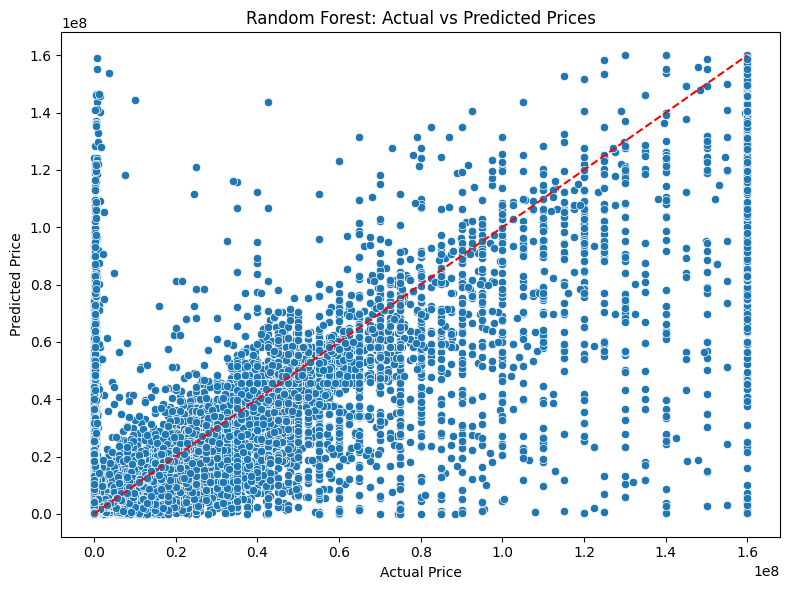

In [192]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.tight_layout()
plt.show()


# 🏠 Predictions on Entire Dataset (Best Model: Random Forest)

In [193]:
df['predicted_price_rf'] = rf_model.predict(X)
pd.set_option('display.float_format', '{:,.0f}'.format)
df[['price', 'predicted_price_rf']].head()

,price,predicted_price_rf
0,10000000,"4,376,103"
1,6900000,"4,901,780"
2,16500000,"5,645,607"
3,43500000,"36,729,162"
4,7000000,"6,910,397"


# 🔮 Prediction on New Data

In [194]:
new_data = pd.DataFrame({
    'area': [3000],
    'bedrooms': [4],
    'baths': [3],
    'house_age': [5],
    'latitude': [33.6844],
    'longitude': [73.0479]
})

print("Prediction for New Data:")
print("Linear Regression:", lr_model.predict(new_data)[0])
print("Random Forest:", rf_model.predict(new_data)[0])
print("Gradient Boosting:", gb_model.predict(new_data)[0])

Prediction for New Data:
Linear Regression: 19549259.861337155
Random Forest: 18100336.666666668
Gradient Boosting: 12745901.989230076


# NOTES

* This project uses real housing data to predict house prices using ML models.

* We performed data cleaning, visualization, and feature engineering.

* Random Forest gave the best results in terms of accuracy.

* The model can now be used to estimate prices for new house listings.